<a href="https://colab.research.google.com/github/sajid-619/Cartoonizer-with-tf/blob/main/White_Box_Cartoonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --branch inference-tf-2.x https://github.com/steubk/White-box-Cartoonization.git
!pip install --upgrade tf_slim

Cloning into 'White-box-Cartoonization'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 188 (delta 34), reused 32 (delta 32), pack-reused 140
Receiving objects: 100% (188/188), 63.41 MiB | 37.49 MiB/s, done.
Resolving deltas: 100% (66/66), done.
     |████████████████████████████████| 352 kB 4.9 MB/s 


In [2]:
import sys
sys.path.append('./White-box-Cartoonization/test_code')

import os
import matplotlib.pyplot as plt
import cartoonize

from PIL import Image

In [4]:
!mkdir -p ./source
!wget https://raw.githubusercontent.com/sajid-619/Cartoonizer-with-tf/master/assets/jobs.jpg  -O ./source/image.jpg

--2022-04-23 20:08:30--  https://raw.githubusercontent.com/sajid-619/Cartoonizer-with-tf/master/assets/jobs.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32136 (31K) [image/jpeg]
Saving to: ‘./source/image.jpg’

./source/image.jpg  100%[===================>]  31.38K  --.-KB/s    in 0.003s  

2022-04-23 20:08:31 (11.8 MB/s) - ‘./source/image.jpg’ saved [32136/32136]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


INFO:tensorflow:Restoring parameters from ./White-box-Cartoonization/test_code/saved_models/model-33999


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


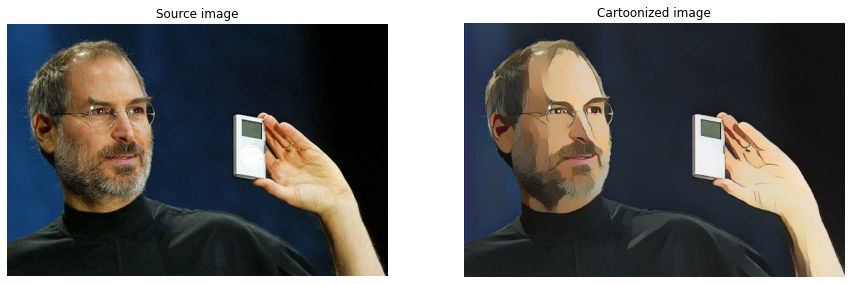

In [5]:
model_path = './White-box-Cartoonization/test_code/saved_models'
load_folder = './source'
save_folder = './cartoonized_images'
if not os.path.exists(save_folder): os.mkdir(save_folder)

cartoonize.cartoonize(load_folder, save_folder, model_path)
source_image = plt.imread('./source/image.jpg')
cartoonized_image = plt.imread('./cartoonized_images/image.jpg')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(source_image)
ax[0].set_title('Source image')
ax[1].imshow(cartoonized_image)
ax[1].set_title('Cartoonized image')
[x.set_axis_off() for x in ax]
plt.show()

In [6]:
# Directory where SavedModel is to be saved
!mkdir -p models/CartoonGAN/saved_model

In [7]:
# Comes with the GitHub repo
# These will be needed to instantiate the model
import network
import guided_filter

In [8]:
# We will be using TensorFlow session
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [9]:
tf.reset_default_graph()
  
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:
  # Create placeholder for the input
  input_photo = tf.placeholder(tf.float32, [1, None, None, 3], name='input_photo')
  
  # Run the input placeholder through the generator, and then apply a 
  # filter to process the generator output
  network_out = network.unet_generator(input_photo)
  final_out = guided_filter.guided_filter(input_photo, network_out, r=1, eps=5e-3)
  final_out = tf.identity(final_out, name='final_output') # Create an identical filtering layer 
 
  # The above process is basically needed to construct the computation graph for the
  # current session
  
  # Get the generator variables and restore the pre-trained checkpoints in the 
  # current session
  all_vars = tf.trainable_variables()
  gene_vars = [var for var in all_vars if 'generator' in var.name]
  saver = tf.train.Saver(var_list=gene_vars)
  sess.run(tf.global_variables_initializer())
  saver.restore(sess, tf.train.latest_checkpoint(model_path))
  
  # Export to SavedModel
  tf.saved_model.simple_save(
      sess,
      '/content/models/CartoonGAN/saved_model',
      inputs={input_photo.name: input_photo},
      outputs={final_out.name: final_out})

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


INFO:tensorflow:Restoring parameters from ./White-box-Cartoonization/test_code/saved_models/model-33999
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /content/models/CartoonGAN/saved_model/saved_model.pb


In [10]:
ls -lah models/CartoonGAN/saved_model

total 152K
drwxr-xr-x 3 root root 4.0K Apr 23 20:10 ./
drwxr-xr-x 3 root root 4.0K Apr 23 20:09 ../
-rw-r--r-- 1 root root 139K Apr 23 20:10 saved_model.pb
drwxr-xr-x 2 root root 4.0K Apr 23 20:10 variables/


In [11]:
!git init

Initialized empty Git repository in /content/.git/


In [30]:
!git config --global user.email "zsajid014@gmail.com"
!git config --global user.name "sajid-619"

In [31]:
!git remote add origin https://github.com/sajid-619/Cartoonizer-with-tf.git

fatal: remote origin already exists.


In [32]:
! git rm --cached White-box-Cartoonization -f

rm 'White-box-Cartoonization'


In [34]:
!git submodule add ./White-box-Cartoonization

'White-box-Cartoonization' already exists in the index


In [38]:
!git branch -M main

In [39]:
!git add .

In [40]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)

	modified:   White-box-Cartoonization (untracked content)

no changes added to commit (use "git add" and/or "git commit -a")


In [41]:
!git commit -m "First Commit"

On branch main
Changes not staged for commit:
	modified:   White-box-Cartoonization (untracked content)

no changes added to commit


In [27]:
!git show-ref

e67eccc98bc0ea0d4d445703833d71a297745a38 refs/heads/master


In [42]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
